<a href="https://colab.research.google.com/github/pgssanjana/micro_projects/blob/main/face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face recognition

https://github.com/ageitgey/face_recognition

In [1]:
!pip3 install face_recognition

     |████████████████████████████████| 100.1 MB 26 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=2decccb64a50601857e5ccf4573b36f4da0a99f4394b174d526da2ff5bb6e937
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


Make known and unknown directories

Now upload your images (left click on files, import into the right folders)

* Base models in known with name as file name
* Pictures of these people in unknown

In [2]:
from PIL import Image, ImageDraw
import face_recognition
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import face_recognition

In [3]:
import cv2
import numpy as np
import face_recognition
import os
from datetime import datetime


In [4]:
path='/content/crime_data'
images=[]
classNames=[]
myList=os.listdir(path)
print(myList)
for c1 in myList:
  curImg=cv2.imread(f'{path}/{c1}')
  images.append(curImg)
  classNames.append(os.path.splitext(c1)[0])
print(classNames)

['dawood_ibrahim.jpeg', 'yakub-memon.jpeg', 'phoolan-devi.jpeg', 'abu-salem.jpeg', 'nirav-modi.jpeg', 'veerappan.jpeg', 'Ilyas_kashmiri.jpeg', 'gurmeet-ram-rahim-singh.jpeg', 'dhananjoy-chatterjee.jpeg', 'arun-gawli.jpeg', 'afzal-guru.jpeg']
['dawood_ibrahim', 'yakub-memon', 'phoolan-devi', 'abu-salem', 'nirav-modi', 'veerappan', 'Ilyas_kashmiri', 'gurmeet-ram-rahim-singh', 'dhananjoy-chatterjee', 'arun-gawli', 'afzal-guru']


In [8]:
from google.colab.patches import cv2_imshow

In [9]:
def read_img(path):
  img=cv2.imread(path)
  (h,w) = img.shape[:2]
  width=500
  ratio=width/float(w)
  height=int(h*ratio)
  return cv2.resize(img,(width,height))

Processing nirav_test.jpeg
[0.60936751 0.831342   0.78799046 0.64263337 0.4189231  0.7678408
 0.74034988 0.75543942 0.71794246 0.76109384]


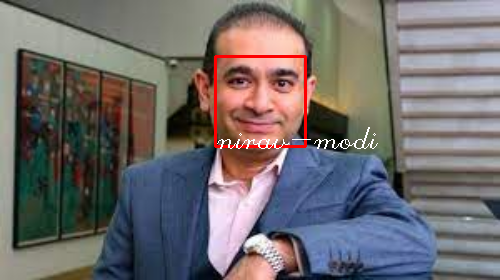

Processing .ipynb_checkpoints
Processing random_test.jpeg
[0.79052329 0.78864123 0.74565281 0.71550101 0.8109233  0.72231117
 0.70321373 0.77573363 0.83787831 0.8078503 ]


In [35]:
known_encodings=[]
known_names=[]
known_dir='/content/crime_data'

for file in os.listdir(known_dir):
  img = read_img(known_dir + '/' + file)
  if len(face_recognition.face_encodings(img))>0:
    img_enc = face_recognition.face_encodings(img)[0]
    known_encodings.append(img_enc)
    known_names.append(file.split('.')[0])

unknown_dir='/content/unknown'
for file in os.listdir(unknown_dir):
  print("Processing",file)
  # if len(unknow_dir)>0:
  if file!='.ipynb_checkpoints':
    img=read_img(unknown_dir + '/' + file)
    if len(face_recognition.face_encodings(img))>0:
      img_enc = face_recognition.face_encodings(img)[0]

      results = face_recognition.compare_faces(known_encodings,img_enc)
      print(face_recognition.face_distance(known_encodings,img_enc))
      for i in range(len(results)):
        c=1
        if results[i] and c==1:
          # print(known_names[i])
          name = known_names[i]
          (top,right,bottom,left) = face_recognition.face_locations(img)[0]
          cv2.rectangle(img , (left,top) , (right,bottom) , (0,0,255) , 2)
          cv2.putText(img,name,(left+2,bottom+2),cv2.FONT_HERSHEY_SCRIPT_COMPLEX,1,(255,255,255),1)
          cv2_imshow(img)
          c+=1
        



    # print(results)

  

In [5]:
from face_recognition.api import face_encodings
def findEncodings(images):
    encodeList = []


    for img in images:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if len(face_recognition.face_encodings)>0:
          encode = face_recognition.face_encodings(img)[0]
          encodeList.append(encode)
    return encodeList


In [7]:
# face_distance,
# face_distance,
video_capture = cv2.VideoCapture(0)

dawood_image=face_recognition.load_image_file('/content/crime_data/dawood_ibrahim.jpeg')
dawood_face_encoding=face_recognition.face_encodings(dawood_image)[0]

ilyas_image=face_recognition.load_image_file('/content/crime_data/Ilyas_kashmiri.jpeg')
ilyas_face_encoding=face_recognition.face_encodings(ilyas_image)[0]

abu_image=face_recognition.load_image_file('/content/crime_data/abu-salem.jpeg')
abu_face_encoding=face_recognition.face_encodings(abu_image)[0]

afzal_image=face_recognition.load_image_file('/content/crime_data/afzal-guru.jpeg')
afzal_face_encoding=face_recognition.face_encodings(afzal_image)[0]

known_face_encodings=[
                      dawood_face_encoding,
                      ilyas_face_encoding,
                      abu_face_encoding,
                      afzal_face_encoding
]

known_face_names=[
                  "Dawood Ibrahim",
                  "Ilyas Kashmiri",
                  "Abu salem",
                  "Afzal guru"
]

face_locations = []
face_encodings = []
face_names = []
process_this_frame = True

while True:
    # Grab a single frame of video
    ret, frame = video_capture.read()

    # Resize frame of video to 1/4 size for faster face recognition processing
    try:
      small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)
    except:
      break;

    # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
    rgb_small_frame = small_frame[:, :, ::-1]

    # Only process every other frame of video to save time
    if process_this_frame:
        # Find all the faces and face encodings in the current frame of video
        face_locations = face_recognition.face_locations(rgb_small_frame)
        face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)

        face_names = []
        for face_encoding in face_encodings:
            # See if the face is a match for the known face(s)
            matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
            name = "Unknown"

            # # If a match was found in known_face_encodings, just use the first one.
            # if True in matches:
            #     first_match_index = matches.index(True)
            #     name = known_face_names[first_match_index]

            # Or instead, use the known face with the smallest distance to the new face
            face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = known_face_names[best_match_index]

            face_names.append(name)

    process_this_frame = not process_this_frame


    # Display the results
    for (top, right, bottom, left), name in zip(face_locations, face_names):
        # Scale back up face locations since the frame we detected in was scaled to 1/4 size
        top *= 4
        right *= 4
        bottom *= 4
        left *= 4

        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

        # Draw a label with a name below the face
        cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

    # Display the resulting image
    cv2.imshow('Video', frame)

    # Hit 'q' on the keyboard to quit!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release handle to the webcam
video_capture.release()
cv2.destroyAllWindows()

In [8]:
video_capture.release()